# Problem Identification

We are creating an analytics type application where the user can explore the dataset provided with an interactive UI. One page in our application will allow the user to choose different features of a PC, Laptop, Or Partially built PC in order to provide the predicted price based on certain specifications.

In [1]:
import sys
# Ensure the executable path is quoted to handle spaces
!"{sys.executable}" -m pip install --upgrade pandas
!"{sys.executable}" -m pip install --upgrade numpy
!"{sys.executable}" -m pip install --upgrade scikit-learn
!"{sys.executable}" -m pip install --upgrade lightgbm
!"{sys.executable}" -m pip install --upgrade xgboost
!"{sys.executable}" -m pip install --upgrade matplotlib
!"{sys.executable}" -m pip install --upgrade seaborn





[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip


## LightGBM


--- Starting Model Training for LAPTOPS with User-Specified Features (with Log Transformation) ---
User-specified features for LAPTOP model training: ['ram_memoria_gb', 'ram_frecuencia_de_la_memoria_mhz', 'ram_tipo', 'disco_duro_capacidad_de_memoria_ssd_gb', 'procesador', 'procesador_frecuencia_turbo_max_ghz', 'grafica_tarjeta', 'pantalla_resolucion_pixeles', 'sistema_operativo_sistema_operativo', 'comunicaciones_estandar_wifi', 'alimentacion_vatios_hora', 'procesador_numero_nucleos', 'grafic_memoria', 'sonido_sistema_de_altavoces', 'alimentacion_wattage_binned']
Loading data...
Laptop data loaded successfully.
Dropped columns from df_laptop (if they existed): ['titulo', 'precio_min', 'precio_max', 'tipo']


Using the following available features for LAPTOP training: ['ram_memoria_gb', 'ram_frecuencia_de_la_memoria_mhz', 'ram_tipo', 'disco_duro_capacidad_de_memoria_ssd_gb', 'procesador', 'procesador_frecuencia_turbo_max_ghz', 'grafica_tarjeta', 'pantalla_resolucion_pixeles', 'sistema_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


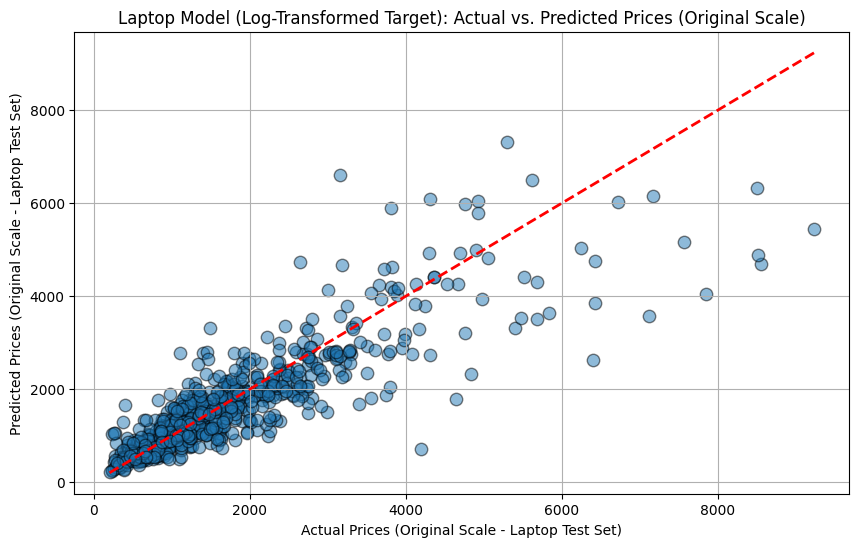

Scatter plot displayed.

--- LAPTOP Model Training with Log-Transformed Target Complete ---


In [3]:
import pandas as pd
import numpy as np
# import xgboost as xgb # Not used in this specific laptop script snippet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import lightgbm as lgb
import matplotlib.pyplot as plt # <--- Added for plotting

print("\n--- Starting Model Training for LAPTOPS with User-Specified Features (with Log Transformation) ---")

# 1. Define the user-specified feature columns (same as before)
user_feature_columns_laptop = [
    "ram_memoria_gb",
    "ram_frecuencia_de_la_memoria_mhz",
    "ram_tipo",
    "disco_duro_capacidad_de_memoria_ssd_gb",
    "procesador",
    "procesador_frecuencia_turbo_max_ghz",
    "grafica_tarjeta",
    "pantalla_resolucion_pixeles",
    "sistema_operativo_sistema_operativo",
    "comunicaciones_estandar_wifi",
    "alimentacion_vatios_hora",
    "procesador_numero_nucleos",
    "grafic_memoria", # Note: Typo in original, assuming 'grafica_memoria' or similar
    "sonido_sistema_de_altavoces",
    "alimentacion_wattage_binned",
]
# Correcting potential typo if 'grafic_memoria' was meant to be 'grafica_memoria'
if 'grafic_memoria' in user_feature_columns_laptop:
    # Example: replace it if it's a known typo and 'grafica_memoria' is the correct name
    # For this example, let's assume 'grafica_memoria' is the intended correct name.
    # Ensure 'grafica_memoria' is actually in your df_laptop.columns if you make this change.
    if 'grafica_memoria' in pd.read_csv('df_engineered_laptop.csv', nrows=0).columns: # Quick check
         user_feature_columns_laptop = [col if col != 'grafic_memoria' else 'grafica_memoria' for col in user_feature_columns_laptop]
         print("Note: Replaced 'grafic_memoria' with 'grafica_memoria' in feature list based on assumption.")
    else:
        print("Warning: 'grafic_memoria' in list, and assumed correction 'grafica_memoria' not found in CSV header. Proceeding with 'grafic_memoria'.")


print(f"User-specified features for LAPTOP model training: {user_feature_columns_laptop}")

# --- 1. DATA LOADING ---
print("Loading data...")
try:
    # !!! IMPORTANT: Ensure this path is correct for YOUR environment !!!
    df_laptop = pd.read_csv('df_engineered_laptop.csv')
    print("Laptop data loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading laptop data: {e}")
    print("Please ensure the file path for df_laptop is correct.")
    raise

# --- 2. INITIAL DATA CLEANING ---
columns_to_drop = ['titulo', 'precio_min', 'precio_max', 'tipo']
existing_cols_laptop = [col for col in columns_to_drop if col in df_laptop.columns]
if existing_cols_laptop:
    df_laptop = df_laptop.drop(columns=existing_cols_laptop)
    print(f"Dropped columns from df_laptop (if they existed): {existing_cols_laptop}")


# 2. Check for existence of these columns in df_laptop and prepare X and y
if 'df_laptop' not in globals() or df_laptop.empty:
    print("Error: df_laptop is not loaded or is empty. Please run previous cells to load data.")
else:
    available_features_laptop = [col for col in user_feature_columns_laptop if col in df_laptop.columns]
    missing_features_laptop = [col for col in user_feature_columns_laptop if col not in df_laptop.columns]

    if missing_features_laptop:
        print(f"\nWarning: The following specified features were NOT found in df_laptop and will be excluded: {missing_features_laptop}")

    if not available_features_laptop:
        print("\nError: None of the specified features were found in df_laptop. Cannot train the model.")
    elif 'precio_mean' not in df_laptop.columns:
        print("\nError: Target column 'precio_mean' not found in df_laptop. Cannot train the model.")
    else:
        print(f"\nUsing the following available features for LAPTOP training: {available_features_laptop}")

        X_specified_laptop = df_laptop[available_features_laptop]
        
        # --- APPLY LOG TRANSFORMATION TO TARGET VARIABLE ---
        y_original_prices_laptop = df_laptop['precio_mean'] # Keep original prices for final evaluation
        y_log_transformed_laptop = np.log1p(y_original_prices_laptop)
        print("Applied np.log1p to the target variable 'precio_mean'.")
        # --- END OF LOG TRANSFORMATION ---

        categorical_features_laptop = X_specified_laptop.select_dtypes(include=['object', 'category']).columns
        numerical_features_laptop = X_specified_laptop.select_dtypes(include=['number']).columns

        print(f"Categorical features for this LAPTOP model: {list(categorical_features_laptop)}")
        print(f"Numerical features for this LAPTOP model: {list(numerical_features_laptop)}")

        numerical_transformer_laptop = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])
        categorical_transformer_laptop = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ])
        preprocessor_laptop = ColumnTransformer(
            transformers=[
                ('num', numerical_transformer_laptop, numerical_features_laptop),
                ('cat', categorical_transformer_laptop, categorical_features_laptop)
            ],
            remainder='passthrough'
        )
        
        # Split data: X, log-transformed y for model training, original y for final evaluation
        # We need to ensure the same split for original prices and log_transformed prices
        indices = np.arange(X_specified_laptop.shape[0])
        X_train_indices, X_test_indices, _, _ = train_test_split(
            indices, indices, test_size=0.2, random_state=42 # y here is just a placeholder for splitting indices
        )

        X_train_laptop = X_specified_laptop.iloc[X_train_indices]
        X_test_laptop = X_specified_laptop.iloc[X_test_indices]
        
        y_train_log_laptop = y_log_transformed_laptop.iloc[X_train_indices]
        # y_test_log_laptop is the target for the model on the test set if needed for direct log-space eval
        # y_test_log_laptop = y_log_transformed_laptop.iloc[X_test_indices] 
        
        y_train_original_laptop = y_original_prices_laptop.iloc[X_train_indices]
        y_test_original_laptop = y_original_prices_laptop.iloc[X_test_indices]


        best_params_from_tuning = { # Use your actual best params from previous DESKTOP tuning
            'n_estimators': 500, 'learning_rate': 0.05, 'num_leaves': 70,
            'max_depth': 10, 'min_child_samples': 20, 'colsample_bytree': 0.8,
            'subsample': 0.8,
            # 'reg_alpha': 0.001, # Add if part of your best desktop params
            # 'reg_lambda': 0.5   # Add if part of your best desktop params
        }

        final_lgbm_laptop = lgb.LGBMRegressor(**best_params_from_tuning, random_state=42, verbose=-1)
        pipeline_laptop_final = Pipeline(steps=[('preprocessor', preprocessor_laptop),
                                                ('regressor', final_lgbm_laptop)])

        print("\nFitting final LAPTOP model with specified parameters (on log-transformed target)...")
        pipeline_laptop_final.fit(X_train_laptop, y_train_log_laptop) # Train on log-transformed y
        print("\nLAPTOP model training complete.")

        best_model_laptop = pipeline_laptop_final

        # --- 7. Evaluate on the Test Set (Predict Log, Inverse Transform, Evaluate on Original) ---
        y_pred_log_test_laptop = best_model_laptop.predict(X_test_laptop)
        y_pred_orig_test_laptop = np.expm1(y_pred_log_test_laptop) # Inverse transform
        y_pred_orig_test_laptop = np.maximum(0, y_pred_orig_test_laptop) # Ensure non-negative prices

        test_mse_laptop = mean_squared_error(y_test_original_laptop, y_pred_orig_test_laptop)
        test_rmse_laptop = np.sqrt(test_mse_laptop)
        test_r2_laptop = r2_score(y_test_original_laptop, y_pred_orig_test_laptop)

        print("\nMetrics on the LAPTOP TEST Set (Log-Transformed Target, Evaluated on Original Scale):")
        print(f"Mean Squared Error (MSE): {test_mse_laptop:.4f}")
        print(f"Root Mean Squared Error (RMSE): {test_rmse_laptop:.4f}")
        print(f"R-squared: {test_r2_laptop:.4f}")

        # --- 8. Evaluate on the Training Set (Predict Log, Inverse Transform, Evaluate on Original) ---
        y_pred_log_train_laptop = best_model_laptop.predict(X_train_laptop)
        y_pred_orig_train_laptop = np.expm1(y_pred_log_train_laptop) # Inverse transform
        y_pred_orig_train_laptop = np.maximum(0, y_pred_orig_train_laptop) # Ensure non-negative prices
        
        train_mse_laptop = mean_squared_error(y_train_original_laptop, y_pred_orig_train_laptop)
        train_rmse_laptop = np.sqrt(train_mse_laptop)
        train_r2_laptop = r2_score(y_train_original_laptop, y_pred_orig_train_laptop)

        print("\nMetrics on the LAPTOP TRAINING Set (Log-Transformed Target, Evaluated on Original Scale):")
        print(f"Mean Squared Error (MSE): {train_mse_laptop:.4f}")
        print(f"Root Mean Squared Error (RMSE): {train_rmse_laptop:.4f}")
        print(f"R-squared: {train_r2_laptop:.4f}")

        # --- SCATTER PLOT FOR PREDICTED VS ACTUAL VALUES (LAPTOP TEST SET - ORIGINAL SCALE) ---
        print("\nGenerating scatter plot for Laptop Model (Log-Transformed Target): Predicted vs Actual Prices (Original Scale)...")
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test_original_laptop, y_pred_orig_test_laptop, alpha=0.5, edgecolors='k', s=80)

        min_val = min(y_test_original_laptop.min(), y_pred_orig_test_laptop.min())
        max_val = max(y_test_original_laptop.max(), y_pred_orig_test_laptop.max())
        # Ensure min_val and max_val are not NaN or inf if there are extreme or problematic values
        if pd.notna(min_val) and pd.notna(max_val) and np.isfinite(min_val) and np.isfinite(max_val):
            plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
        else:
            print("Warning: Could not plot diagonal line due to non-finite min/max values for scatter plot axes.")


        plt.xlabel("Actual Prices (Original Scale - Laptop Test Set)")
        plt.ylabel("Predicted Prices (Original Scale - Laptop Test Set)")
        plt.title("Laptop Model (Log-Transformed Target): Actual vs. Predicted Prices (Original Scale)")
        plt.grid(True)
        plt.show()
        print("Scatter plot displayed.")

print("\n--- LAPTOP Model Training with Log-Transformed Target Complete ---")

--- Starting Model Training for LAPTOPS with User-Specified Features ---
User-specified features for LAPTOP model training: ['ram_memoria_gb', 'ram_frecuencia_de_la_memoria', 'ram_tipo', 'disco_duro_capacidad_de_memoria_ssd_gb', 'procesador', 'procesador_frecuencia_turbo_max_ghz', 'grafica_tarjeta', 'pantalla_resolucion_pulgadas', 'sistema_operativo_sistema_operativo', 'comunicaciones_estandar_wifi']
Loading data...
Desktop PC data loaded successfully.
Dropped columns from df_laptop (if they existed): ['titulo', 'precio_min', 'precio_max', 'tipo']

Warning: The following specified features were NOT found in df_laptop and will be excluded: ['ram_frecuencia_de_la_memoria', 'pantalla_resolucion_pulgadas']

Using the following available features for LAPTOP training: ['ram_memoria_gb', 'ram_tipo', 'disco_duro_capacidad_de_memoria_ssd_gb', 'procesador', 'procesador_frecuencia_turbo_max_ghz', 'grafica_tarjeta', 'sistema_operativo_sistema_operativo', 'comunicaciones_estandar_wifi']
Categorical features for this LAPTOP model: ['ram_tipo', 'procesador', 'grafica_tarjeta', 'sistema_operativo_sistema_operativo', 'comunicaciones_estandar_wifi']
Numerical features for this LAPTOP model: ['ram_memoria_gb', 'disco_duro_capacidad_de_memoria_ssd_gb', 'procesador_frecuencia_turbo_max_ghz']

Fitting GridSearchCV with user-specified features for LAPTOPS...
Fitting 5 folds for each of 144 candidates, totalling 720 fits

Best parameters found by GridSearchCV (User-Specified Features for LAPTOPS):
{'regressor__colsample_bytree': 0.8, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 10, 'regressor__min_child_samples': 20, 'regressor__n_estimators': 500, 'regressor__num_leaves': 70, 'regressor__reg_alpha': 0.001, 'regressor__reg_lambda': 0.5, 'regressor__subsample': 0.8}

LAPTOP model training complete using best estimator from GridSearchCV (User-Specified Features).

Metrics on the LAPTOP TEST Set (User-Specified Features):
Mean Squared Error (MSE): 578575.7598
Root Mean Squared Error (RMSE): 760.6417
R-squared: 0.6599

Metrics on the LAPTOP TRAINING Set (User-Specified Features):
Mean Squared Error (MSE): 468260.8446
Root Mean Squared Error (RMSE): 684.2959
R-squared: 0.6932

--- LAPTOP Model Training with User-Specified Features Complete ---
C:\Users\Valentina G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
C:\Users\Valentina G\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(

## XGBoost

In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb # <--- Added XGBoost import
from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import GradientBoostingRegressor # Kept if you might switch back
from sklearn.metrics import mean_squared_error, r2_score # make_scorer is available if needed
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import lightgbm as lgb # Kept for the feature selection part, can be removed if FS model also changes

# --- 1. DATA LOADING ---
print("Loading data...")
try:
    # !!! IMPORTANT: Verify and correct this path for your desktop PC data !!!
    df_desktop_pc = pd.read_csv('/Users/oliverholmes/Documents/BCSAI/SecondYear/Machine Learning/Assignments/PcPartPicker3000/assignment/df_engineered_desktop_pc.csv') # Or your actual desktop data file
    print("Desktop PC data loaded successfully.")
    # Load other dataframes if they are used elsewhere in your notebook, otherwise they can be removed.
    # df = pd.read_csv('/Users/oliverholmes/Documents/BCSAI/SecondYear/Machine Learning/Assignments/PcPartPicker3000/assignment/df_engineered.csv')
    # df_laptop = pd.read_csv('/Users/oliverholmes/Documents/BCSAI/SecondYear/Machine Learning/Assignments/PcPartPicker3000/assignment/df_engineered_laptop.csv')
    # df_partial_pc = pd.read_csv('/Users/oliverholmes/Documents/BCSAI/SecondYear/Machine Learning/Assignments/PcPartPicker3000/assignment/df_engineered_partial_pc.csv')
except FileNotFoundError as e:
    print(f"Error loading desktop PC data: {e}")
    print("Please ensure the file path for df_desktop_pc is correct.")
    raise

# --- 2. INITIAL DATA CLEANING (Example from your snippets) ---
# Adjust if these columns are not relevant or if other cleaning is needed for df_desktop_pc
columns_to_drop = ['titulo', 'precio_min', 'precio_max', 'tipo']
existing_cols_desktop = [col for col in columns_to_drop if col in df_desktop_pc.columns]
if existing_cols_desktop:
    df_desktop_pc = df_desktop_pc.drop(columns=existing_cols_desktop)
    print(f"Dropped columns from df_desktop_pc (if they existed): {existing_cols_desktop}")


# --- 3. SANITY CHECKS FOR df_desktop_pc ---
if 'precio_mean' not in df_desktop_pc.columns:
    raise ValueError("Target column 'precio_mean' not found in df_desktop_pc after initial processing.")
if df_desktop_pc.empty:
    raise ValueError("The DataFrame df_desktop_pc is empty. Cannot train the model.")

# --- 4. DEFINE INITIAL FEATURES FOR SELECTION ---
initial_columns_to_consider = [col for col in df_desktop_pc.columns if col != 'precio_mean']
if not initial_columns_to_consider:
    raise ValueError("No feature columns found in df_desktop_pc after excluding 'precio_mean'.")
print(f"Initial columns for feature selection consideration: {initial_columns_to_consider}")

# --- 5. FEATURE SELECTION BLOCK (using LightGBM for importances, can be changed) ---
# This block remains the same, using LightGBM to determine feature importances.
# If you want to use XGBoost for feature selection as well, this part would need modification.
print("\n--- Starting Feature Selection Process (using LightGBM for importances) ---")

X_initial = df_desktop_pc[initial_columns_to_consider]
y_initial = df_desktop_pc['precio_mean']

categorical_features_initial = X_initial.select_dtypes(include=['object', 'category']).columns
numerical_features_initial = X_initial.select_dtypes(include=['number']).columns

print(f"Initial categorical features for FS: {list(categorical_features_initial)}")
print(f"Initial numerical features for FS: {list(numerical_features_initial)}")

numerical_transformer_fs = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer_fs = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor_fs = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_fs, numerical_features_initial),
        ('cat', categorical_transformer_fs, categorical_features_initial)
    ], remainder='passthrough')

X_train_fs, _, y_train_fs, _ = train_test_split(X_initial, y_initial, test_size=0.2, random_state=42)

lgbm_fs = lgb.LGBMRegressor(random_state=42, verbose=-1) # Using LightGBM for feature selection
pipeline_fs = Pipeline(steps=[('preprocessor', preprocessor_fs), ('regressor', lgbm_fs)])

print("Fitting pipeline for feature selection (LightGBM)...")
pipeline_fs.fit(X_train_fs, y_train_fs)
print("Feature selection pipeline fitting complete.")

importances_fs = pipeline_fs.named_steps['regressor'].feature_importances_
transformed_feature_names_fs = pipeline_fs.named_steps['preprocessor'].get_feature_names_out()
original_feature_importances = {col: 0.0 for col in initial_columns_to_consider}

for i, full_transformed_name in enumerate(transformed_feature_names_fs):
    importance_value = importances_fs[i]
    name_parts = full_transformed_name.split('__', 1)
    if len(name_parts) < 2: continue
    transformer_prefix, internal_name = name_parts
    if transformer_prefix == 'num' and internal_name in original_feature_importances:
        original_feature_importances[internal_name] += importance_value
    elif transformer_prefix == 'cat':
        for original_cat_col in categorical_features_initial:
            if internal_name == original_cat_col or internal_name.startswith(original_cat_col + "_"):
                original_feature_importances[original_cat_col] += importance_value
                break
    elif transformer_prefix == 'remainder' and internal_name in original_feature_importances:
        original_feature_importances[internal_name] += importance_value

sorted_original_features = sorted(original_feature_importances.items(), key=lambda item: item[1], reverse=True)
print("\nFeature importances (aggregated from initial set using LightGBM):")
for feature, score in sorted_original_features: print(f"{feature}: {score:.4f}")

columns_to_keep = [feature for feature, score in sorted_original_features if score > 0]
if not columns_to_keep:
    print("\nWarning: No features found with importance score > 0 from LightGBM FS.")
else:
    print(f"\nSelected {len(columns_to_keep)} features (importance > 0 from LightGBM FS) for main model: {columns_to_keep}")
print("--- Feature Selection Process Complete ---")


# --- 6. MAIN MODEL TRAINING AND EVALUATION with XGBoost ---
if not columns_to_keep:
    print("\nHalting script: No features selected for the main model.")
else:
    print("\n--- Starting Main Model Training and Evaluation with XGBoost ---")
    X = df_desktop_pc[columns_to_keep]
    y = df_desktop_pc['precio_mean']

    categorical_features = X.select_dtypes(include=['object', 'category']).columns
    numerical_features = X.select_dtypes(include=['number']).columns

    print(f"Categorical features for XGBoost model: {list(categorical_features)}")
    print(f"Numerical features for XGBoost model: {list(numerical_features)}")

    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ], remainder='passthrough')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # XGBoost Parameter Grid for GridSearchCV
    # Note: XGBoost can handle categorical features with its 'enable_categorical=True' experimental feature,
    # but it's often more robust to one-hot encode them as we are doing.
    param_grid_xgb = {
        'regressor__n_estimators': [100, 200, 300],
        # 'regressor__learning_rate': [0.01, 0.05, 0.1],
        # 'regressor__max_depth': [3, 5, 7], # Typical values for XGBoost
        # 'regressor__subsample': [0.7, 0.8, 1.0],
        # 'regressor__colsample_bytree': [0.7, 0.8, 1.0],
        # 'regressor__gamma': [0, 0.1, 0.2], # Minimum loss reduction required to make a further partition
        # 'regressor__reg_alpha': [0, 0.01, 0.1], # L1 regularization
        # 'regressor__reg_lambda': [1, 0.1, 0.01]  # L2 regularization (XGBoost default is 1)
    }

    # Create the pipeline with XGBoost Regressor
    # XGBoost may issue warnings about unsupported 'verbose' if passed from LGBM feature selector;
    # we define a new regressor instance here.
    pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', xgb.XGBRegressor(random_state=42, objective='reg:squarederror'))])
                                   # objective='reg:squarederror' suppresses a warning in newer XGBoost versions.

    grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

    print("Fitting GridSearchCV with XGBoost...")
    grid_search_xgb.fit(X_train, y_train)

    print("\nBest parameters found by GridSearchCV for XGBoost:")
    print(grid_search_xgb.best_params_)

    best_model_xgb = grid_search_xgb.best_estimator_
    print("\nXGBoost model pipeline fitting complete using best estimator from GridSearchCV.")

    # Evaluate on the Test Set
    y_pred_test_xgb = best_model_xgb.predict(X_test)
    test_mse_xgb = mean_squared_error(y_test, y_pred_test_xgb)
    test_rmse_xgb = np.sqrt(test_mse_xgb)
    test_r2_xgb = r2_score(y_test, y_pred_test_xgb)

    print("\nMetrics on the TEST Set (using best XGBoost model):")
    print(f"Mean Squared Error (MSE): {test_mse_xgb:.4f}")
    print(f"Root Mean Squared Error (RMSE): {test_rmse_xgb:.4f}")
    print(f"R-squared: {test_r2_xgb:.4f}")

    # Evaluate on the Training Set
    y_pred_train_xgb = best_model_xgb.predict(X_train)
    train_mse_xgb = mean_squared_error(y_train, y_pred_train_xgb)
    train_rmse_xgb = np.sqrt(train_mse_xgb)
    train_r2_xgb = r2_score(y_train, y_pred_train_xgb)

    print("\nMetrics on the TRAINING Set (using best XGBoost model):")
    print(f"Mean Squared Error (MSE): {train_mse_xgb:.4f}")
    print(f"Root Mean Squared Error (RMSE): {train_rmse_xgb:.4f}")
    print(f"R-squared: {train_r2_xgb:.4f}")

print("\n--- Script Execution Complete ---")

Loading data...
Desktop PC data loaded successfully.
Dropped columns from df_desktop_pc (if they existed): ['titulo', 'precio_min', 'precio_max', 'tipo']
Initial columns for feature selection consideration: ['tipo_de_producto', 'serie', 'procesador', 'disco_duro_tipo_de_disco_duro', 'procesador_fabricante', 'procesador_tipo', 'disco_duro_numero_de_discos_duros_instalados', 'sistema_operativo_sistema_operativo', 'procesador_nombre_clave', 'ram_tipo', 'procesador_numero_nucleos', 'grafica_tarjeta', 'comunicaciones_estandar_lan', 'propiedades_de_la_carcasa_tipo_de_caja', 'adecuado_para', 'procesador_zocalo_de_cpu', 'medidas_y_peso_profundidad_cm', 'medidas_y_peso_ancho_cm', 'procesador_cache_mb', 'ram_memoria_gb', 'ram_frecuencia_de_la_memoria_mhz', 'disco_duro_capacidad_de_memoria_ssd_gb', 'procesador_frecuencia_turbo_max_ghz', 'medidas_y_peso_alto_cm', 'procesador_frecuencia_del_reloj_ghz', 'procesador_tdp_watts', 'grafica_memoria_mb', 'alimentacion_wattage_binned', 'custom_category', '

## Nueral Net

In [5]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor # <--- Added MLPRegressor import
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import lightgbm as lgb # Kept for the feature selection part

# --- 1. DATA LOADING ---
print("Loading data...")
try:
    # !!! IMPORTANT: Verify and correct this path for your desktop PC data !!!
    df_desktop_pc = pd.read_csv('/Users/oliverholmes/Documents/BCSAI/SecondYear/Machine Learning/Assignments/PcPartPicker3000/assignment/df_engineered_desktop_pc.csv') # Or your actual desktop data file
    print("Desktop PC data loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading desktop PC data: {e}")
    print("Please ensure the file path for df_desktop_pc is correct.")
    raise

# --- 2. INITIAL DATA CLEANING ---
columns_to_drop = ['titulo', 'precio_min', 'precio_max', 'tipo']
existing_cols_desktop = [col for col in columns_to_drop if col in df_desktop_pc.columns]
if existing_cols_desktop:
    df_desktop_pc = df_desktop_pc.drop(columns=existing_cols_desktop)
    print(f"Dropped columns from df_desktop_pc (if they existed): {existing_cols_desktop}")

# --- 3. SANITY CHECKS FOR df_desktop_pc ---
if 'precio_mean' not in df_desktop_pc.columns:
    raise ValueError("Target column 'precio_mean' not found in df_desktop_pc.")
if df_desktop_pc.empty:
    raise ValueError("The DataFrame df_desktop_pc is empty.")

# --- 4. DEFINE INITIAL FEATURES FOR SELECTION ---
initial_columns_to_consider = [col for col in df_desktop_pc.columns if col != 'precio_mean']
if not initial_columns_to_consider:
    raise ValueError("No feature columns found in df_desktop_pc after excluding 'precio_mean'.")
print(f"Initial columns for feature selection: {initial_columns_to_consider}")

# --- 5. FEATURE SELECTION BLOCK (using LightGBM for importances) ---
print("\n--- Starting Feature Selection Process (using LightGBM for importances) ---")
X_initial = df_desktop_pc[initial_columns_to_consider]
y_initial = df_desktop_pc['precio_mean']

categorical_features_initial = X_initial.select_dtypes(include=['object', 'category']).columns
numerical_features_initial = X_initial.select_dtypes(include=['number']).columns

numerical_transformer_fs = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_transformer_fs = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')), ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
preprocessor_fs = ColumnTransformer(transformers=[('num', numerical_transformer_fs, numerical_features_initial), ('cat', categorical_transformer_fs, categorical_features_initial)], remainder='passthrough')

X_train_fs, _, y_train_fs, _ = train_test_split(X_initial, y_initial, test_size=0.2, random_state=42)
lgbm_fs = lgb.LGBMRegressor(random_state=42, verbose=-1)
pipeline_fs = Pipeline(steps=[('preprocessor', preprocessor_fs), ('regressor', lgbm_fs)])

print("Fitting pipeline for feature selection (LightGBM)...")
pipeline_fs.fit(X_train_fs, y_train_fs)
print("Feature selection pipeline fitting complete.")

importances_fs = pipeline_fs.named_steps['regressor'].feature_importances_
transformed_feature_names_fs = pipeline_fs.named_steps['preprocessor'].get_feature_names_out()
original_feature_importances = {col: 0.0 for col in initial_columns_to_consider}

for i, full_transformed_name in enumerate(transformed_feature_names_fs):
    importance_value = importances_fs[i]
    name_parts = full_transformed_name.split('__', 1)
    if len(name_parts) < 2: continue
    transformer_prefix, internal_name = name_parts
    if transformer_prefix == 'num' and internal_name in original_feature_importances:
        original_feature_importances[internal_name] += importance_value
    elif transformer_prefix == 'cat':
        for original_cat_col in categorical_features_initial:
            if internal_name == original_cat_col or internal_name.startswith(original_cat_col + "_"):
                original_feature_importances[original_cat_col] += importance_value
                break
    elif transformer_prefix == 'remainder' and internal_name in original_feature_importances:
        original_feature_importances[internal_name] += importance_value

sorted_original_features = sorted(original_feature_importances.items(), key=lambda item: item[1], reverse=True)
print("\nFeature importances (aggregated from LightGBM FS):")
for feature, score in sorted_original_features: print(f"{feature}: {score:.4f}")

columns_to_keep = [feature for feature, score in sorted_original_features if score > 0]
if not columns_to_keep:
    print("\nWarning: No features found with importance > 0 from LightGBM FS.")
else:
    print(f"\nSelected {len(columns_to_keep)} features (importance > 0 from LightGBM FS) for main model: {columns_to_keep}")
print("--- Feature Selection Process Complete ---")

# --- 6. MAIN MODEL TRAINING AND EVALUATION with MLPRegressor ---
if not columns_to_keep:
    print("\nHalting script: No features selected for the main model.")
else:
    print("\n--- Starting Main Model Training and Evaluation with MLPRegressor ---")
    X = df_desktop_pc[columns_to_keep]
    y = df_desktop_pc['precio_mean']

    categorical_features = X.select_dtypes(include=['object', 'category']).columns
    numerical_features = X.select_dtypes(include=['number']).columns

    print(f"Categorical features for MLP model: {list(categorical_features)}")
    print(f"Numerical features for MLP model: {list(numerical_features)}")

    numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())]) # Scaling is crucial for NNs
    categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')), ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
    preprocessor = ColumnTransformer(transformers=[('num', numerical_transformer, numerical_features), ('cat', categorical_transformer, categorical_features)], remainder='passthrough')

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # MLPRegressor Parameter Grid for GridSearchCV
    param_grid_mlp = {
        'regressor__hidden_layer_sizes': [(50,), (100,), (50,25)], # One or two hidden layers
        # 'regressor__activation': ['relu', 'tanh'],
        # 'regressor__solver': ['adam'], # Adam is often a good default
        'regressor__alpha': [0.0001, 0.001, 0.01], # L2 regularization
        # 'regressor__learning_rate_init': [0.001, 0.01],
        # 'regressor__max_iter': [300, 500] # Allow more iterations for convergence
        'regressor__early_stopping': [True], # Can help prevent overfitting and speed up grid search
        # 'regressor__n_iter_no_change': [10]   # Used with early_stopping
    }

    pipeline_mlp = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', MLPRegressor(random_state=42))])

    grid_search_mlp = GridSearchCV(pipeline_mlp, param_grid_mlp, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

    print("Fitting GridSearchCV with MLPRegressor...")
    grid_search_mlp.fit(X_train, y_train) # NNs can take longer to train, especially with GridSearchCV

    print("\nBest parameters found by GridSearchCV for MLPRegressor:")
    print(grid_search_mlp.best_params_)

    best_model_mlp = grid_search_mlp.best_estimator_
    print("\nMLPRegressor model pipeline fitting complete using best estimator.")

    # Evaluate on the Test Set
    y_pred_test_mlp = best_model_mlp.predict(X_test)
    test_mse_mlp = mean_squared_error(y_test, y_pred_test_mlp)
    test_rmse_mlp = np.sqrt(test_mse_mlp)
    test_r2_mlp = r2_score(y_test, y_pred_test_mlp)

    print("\nMetrics on the TEST Set (using best MLPRegressor model):")
    print(f"Mean Squared Error (MSE): {test_mse_mlp:.4f}")
    print(f"Root Mean Squared Error (RMSE): {test_rmse_mlp:.4f}")
    print(f"R-squared: {test_r2_mlp:.4f}")

    # Evaluate on the Training Set
    y_pred_train_mlp = best_model_mlp.predict(X_train)
    train_mse_mlp = mean_squared_error(y_train, y_pred_train_mlp)
    train_rmse_mlp = np.sqrt(train_mse_mlp)
    train_r2_mlp = r2_score(y_train, y_pred_train_mlp)

    print("\nMetrics on the TRAINING Set (using best MLPRegressor model):")
    print(f"Mean Squared Error (MSE): {train_mse_mlp:.4f}")
    print(f"Root Mean Squared Error (RMSE): {train_rmse_mlp:.4f}")
    print(f"R-squared: {train_r2_mlp:.4f}")

print("\n--- Script Execution Complete ---")

Loading data...
Desktop PC data loaded successfully.
Dropped columns from df_desktop_pc (if they existed): ['titulo', 'precio_min', 'precio_max', 'tipo']
Initial columns for feature selection: ['tipo_de_producto', 'serie', 'procesador', 'disco_duro_tipo_de_disco_duro', 'procesador_fabricante', 'procesador_tipo', 'disco_duro_numero_de_discos_duros_instalados', 'sistema_operativo_sistema_operativo', 'procesador_nombre_clave', 'ram_tipo', 'procesador_numero_nucleos', 'grafica_tarjeta', 'comunicaciones_estandar_lan', 'propiedades_de_la_carcasa_tipo_de_caja', 'adecuado_para', 'procesador_zocalo_de_cpu', 'medidas_y_peso_profundidad_cm', 'medidas_y_peso_ancho_cm', 'procesador_cache_mb', 'ram_memoria_gb', 'ram_frecuencia_de_la_memoria_mhz', 'disco_duro_capacidad_de_memoria_ssd_gb', 'procesador_frecuencia_turbo_max_ghz', 'medidas_y_peso_alto_cm', 'procesador_frecuencia_del_reloj_ghz', 'procesador_tdp_watts', 'grafica_memoria_mb', 'alimentacion_wattage_binned', 'custom_category', 'equip_altavoce

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iteration


Best parameters found by GridSearchCV for MLPRegressor:
{'regressor__alpha': 0.01, 'regressor__early_stopping': True, 'regressor__hidden_layer_sizes': (50, 25)}

MLPRegressor model pipeline fitting complete using best estimator.

Metrics on the TEST Set (using best MLPRegressor model):
Mean Squared Error (MSE): 1000189.1784
Root Mean Squared Error (RMSE): 1000.0946
R-squared: 0.5298

Metrics on the TRAINING Set (using best MLPRegressor model):
Mean Squared Error (MSE): 237079.8472
Root Mean Squared Error (RMSE): 486.9085
R-squared: 0.8259

--- Script Execution Complete ---


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Dataset Creation

## Dataset Preperation

### Categorical Encoding

# Model Selection

After 230 minutes of running, this was the result of the cross validation:

GridSearchCV Complete.
Best parameters found: {'regressor__colsample_bytree': 0.8, 'regressor__learning_rate': 0.05, 'regressor__max_depth': 10, 'regressor__min_child_samples': 20, 'regressor__n_estimators': 500, 'regressor__num_leaves': 70, 'regressor__subsample': 0.8}

Best cross-validation score (negative MSE): -375894.4673686046

Best cross-validation RMSE: 613.1023302586646

Metrics on the Test Set using the Best Model from GridSearchCV:

Mean Squared Error (MSE): 347437.5443584199

Root Mean Squared Error (RMSE): 589.4383295633394

R-squared: 0.7957941987120332
Metrics on the Training Set using the Best Model from GridSearchCV:

Mean Squared Error (MSE): 73745.4619638589

Root Mean Squared Error (RMSE): 271.5611569496987

R-squared: 0.9516823528897075

# Model Training

# Model Assessment

# Model Optimization

# Model Deployment